In [1]:
#Imports
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.io import ascii
from sklearn.neighbors import KernelDensity
from scipy import ndimage

In [2]:
#File paths
this_dir = os.getcwd()
model_dir = this_dir[:-5] + 'SUMO_results/SUMO_Projects_v2p0/'

In [3]:
#Read in the data
epochs = np.array(['150d', '200d', '250d', '300d', '350d', '400d'])
masses = np.array(['3p30', '4p00', '5p00', '6p00', '8p00'])
mixings = np.array(['40_60', '18_82', '10_90', '10_90', '10_90'])

wl_lists, flux_lists = [], []

for i in range(len(masses)):
    local_wl_list, local_flux_list = [], []
    
    for j in range(len(epochs)):
        file_path = model_dir + epochs[j] +  '/spectrum_he' + masses[i] + '_AJ_' + mixings[i] + '.datrun001'
        spectrum = ascii.read(file_path)
        
        local_wl_list.append(spectrum['col1'])
        local_flux_list.append(spectrum['col2'])
        
    wl_lists.append(local_wl_list)
    flux_lists.append(local_flux_list)

Here is a comparision for epoch:  150d
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3


/tmp/ipykernel_28346/788984456.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[j].set_yticklabels(['0.0', '0.5'])


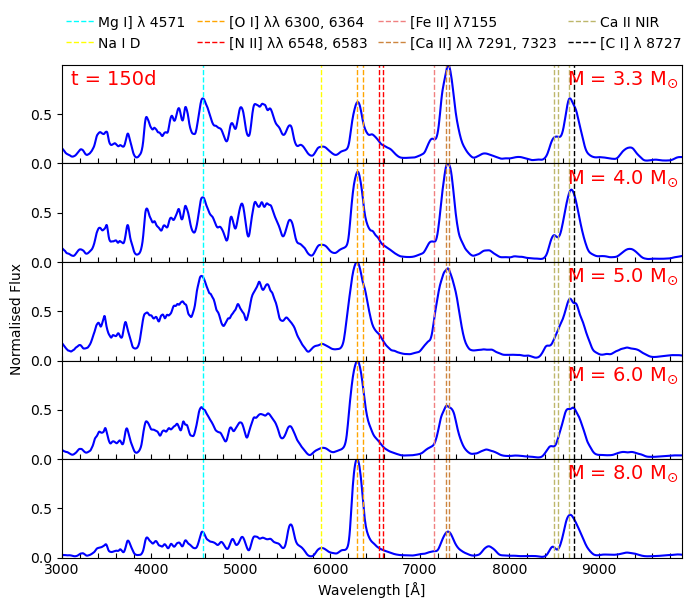

Here is a comparision for epoch:  200d
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3


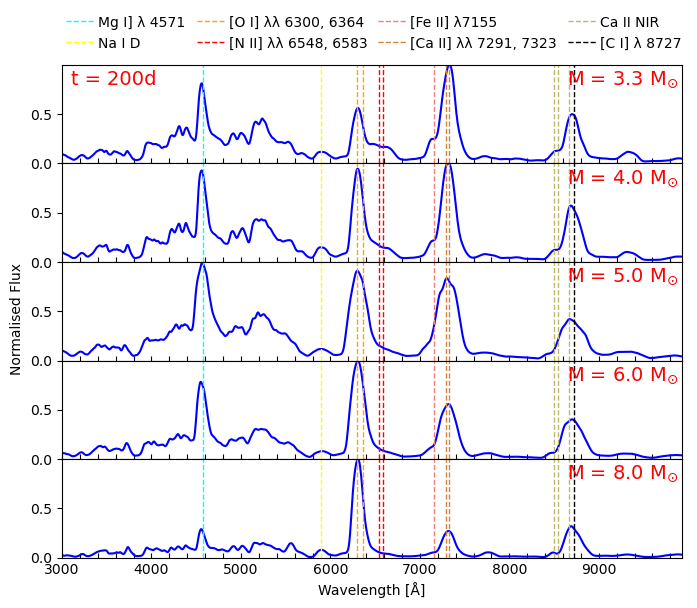

Here is a comparision for epoch:  250d
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3


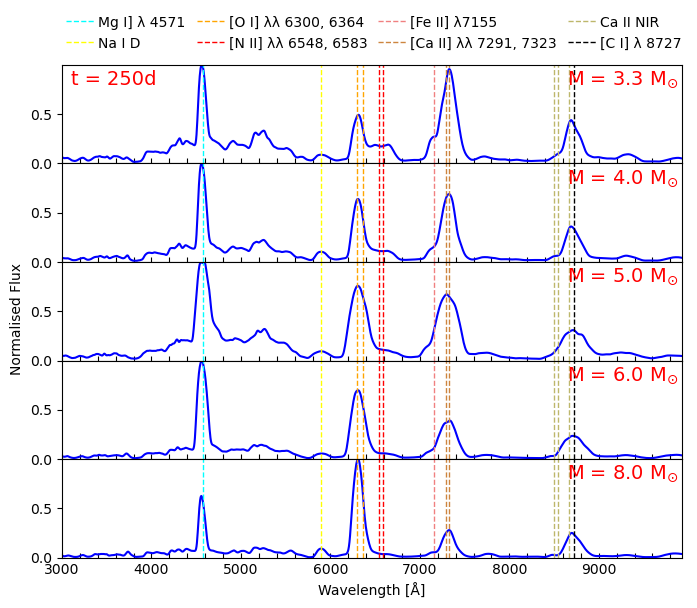

Here is a comparision for epoch:  300d
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3


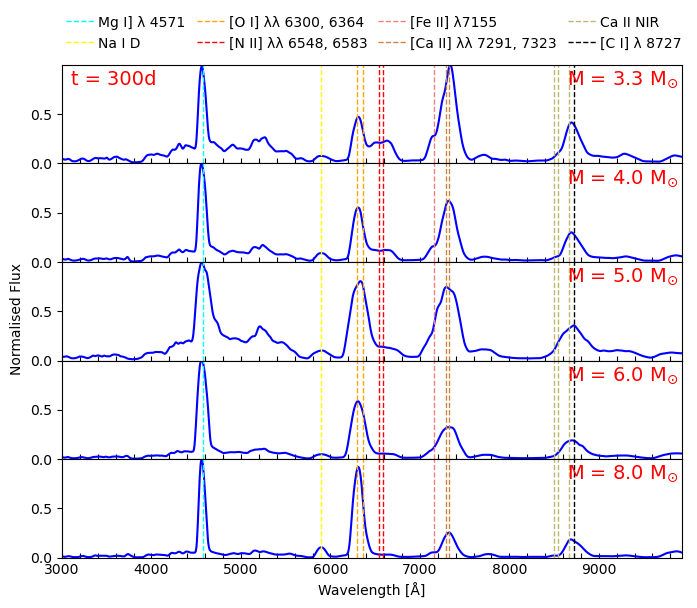

Here is a comparision for epoch:  350d
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3


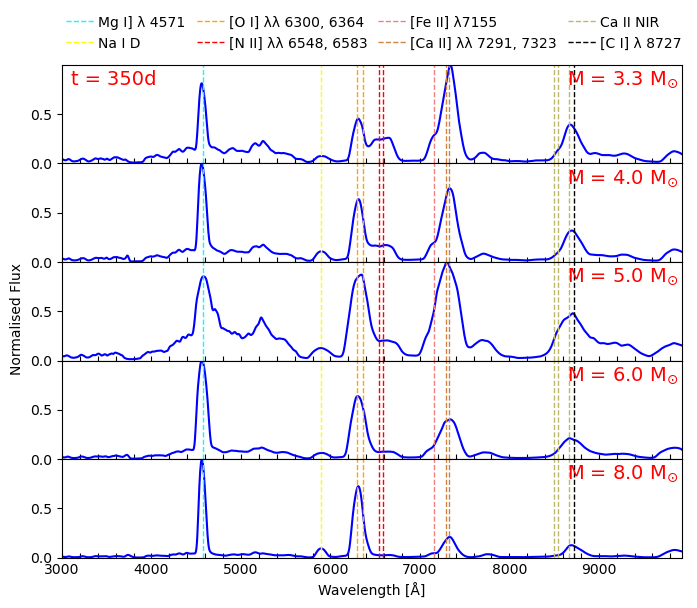

Here is a comparision for epoch:  400d
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3
1001.5474712301548 9932.937203510886 9948.3


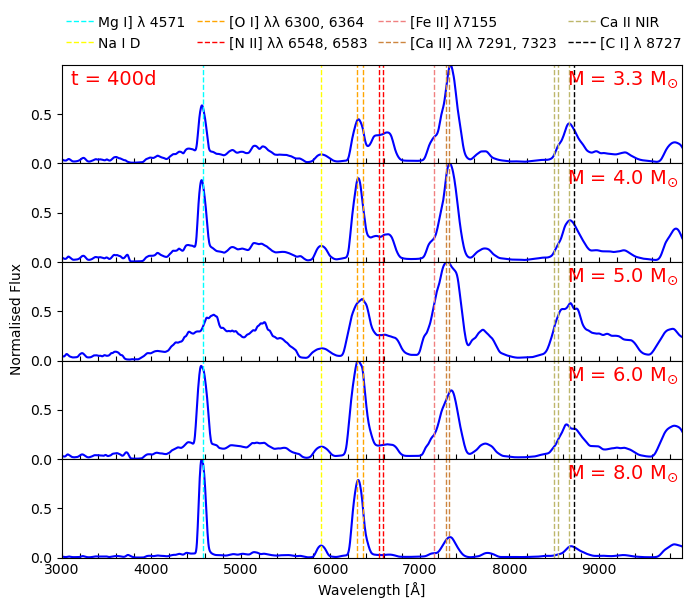

In [4]:
#Create plots: v2
masses_text = ['3.3', '4.0', '5.0', '6.0', '8.0']

for i in range(len(epochs)):
    
    print('Here is a comparision for epoch: ', epochs[i])
    
    fig, ax = plt.subplots(5, figsize = (8, 6.4))
    plt.subplots_adjust(hspace = 0, wspace = 0)
    
    for j in range(len(masses)):
        wl, flux = wl_lists[j][i], flux_lists[j][i]
        
        #Smooth the spectrum with R = 1000 at lambda0 = 5000, typical spectograph
        sigma = 2.5 #Ångström
        wl_smooth = ndimage.gaussian_filter1d(wl, sigma)
        print(np.min(wl_smooth), np.max(wl_smooth), np.max(wl))
        flux_smooth = ndimage.gaussian_filter1d(flux, sigma)
        
        #Plot the smoothed spectrum
        ax[j].plot(wl_smooth, flux_smooth/np.max(flux_smooth), c = 'blue')
        
        ax[j].set_xlim(3000, 9930)
        ax[j].set_ylim(0, 1)
    
        #Add some text to the plot, indicating which model it is
        trans = ax[j].get_xaxis_transform()
        if j == 0:
            fig.text(3100, 0.8, s = 't = ' + epochs[i], transform = trans, c = 'r', fontsize = 14 )
        
        fig.text(8650, 0.8, s = 'M = ' + masses_text[j] + ' M$_{\odot}$', transform = trans, c = 'r', fontsize = 14 )
        
        ax[j].set_yticklabels(['0.0', '0.5'])
        ax[j].set_yticks([0, 0.5])
        
        #Now also add line identifications to the plot
        labels = np.array(["Mg I] λ 4571", "Na I D", "[O I] λλ 6300, 6364", "",
                       "[N II] λλ 6548, 6583", "", "[Fe II] λ7155",
                        "[Ca II] λλ 7291, 7323", "", "Ca II NIR", "", "",
                           "[C I] λ 8727"])
        colours = np.array(["cyan", "yellow", "orange", "orange", 
                           "red", "red", "lightcoral",
                           "peru", "peru", "darkkhaki", "darkkhaki", "darkkhaki",
                           "k"])
        line_wl = np.array([4571, 5893, 6300, 6363, 6548, 6583, 7155, 7291, 7323, 
                           8498, 8542, 8662, 8727])
        
        #Create line identifications and labels
        for p in range(len(line_wl)):
            if labels[p] != "" and j == 0:
                ax[j].axvline(x = line_wl[p], linestyle = '--', c = colours[p], lw = 1, alpha = 1, label = labels[p])
            else:
                ax[j].axvline(x = line_wl[p], linestyle = '--', c = colours[p], lw = 1, alpha = 1)
        
        #Make some more ticks for better visibility
        label_list = []
        for q in range(35):
            if q%5 != 0:
                label_list.append("")
            else:
                label_list.append(str(int( 3000 + q*200)))
        
        ax[j].tick_params(axis = 'x', direction = 'in')
        
        #No labels except for bottom plot
        if j != 4:
            ax[j].set_xticks(ticks = np.arange(3000, 10000, 200), labels = [])
        else:
            ax[j].set_xticks(ticks = np.arange(3000, 10000, 200), labels = label_list)
        
            
    
    fig.text(0.06, 0.4, s = 'Normalised Flux', rotation = 90)
    ax[-1].set_xlabel('Wavelength [Å]')
    
    plt.figlegend(bbox_to_anchor=(0.015, 0.93, 1, 0.0), loc= 'center',
              borderaxespad = 0, handletextpad = 0.3, ncol=4 ,columnspacing=0.8, frameon= False)
    
    plt.savefig('Figure_x_Model_Spectra_Collage_' + epochs[i] + '.png', bbox_inches = 'tight', dpi = 300)
    plt.show()